In [7]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
# import tensorflow as tf
# from keras import models
# from keras import layers

# # sklearn
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('coffee_drinking_dataset_for_analysis.csv')
df.head()

,Timestamp,Name,Email,Do you drink at least one cup of coffee 4 times a week?,What time did you wake up this morning?,"What time did you drink your coffee?\n\n- A) On day 1 you need to drink coffee 20 minutes after waking up.\n\n- B) On day 2 you need to drink coffee 2 hours after waking up.\n\nIf you skipped this time interval, please don't submit the form.","How many hours has it been since you woke up?\n\nFor testing accuracy, please complete this survey 6 hours after waking up. \n\nIf you're filling it out earlier or later than 6 hours after waking up, that's okay—just be honest in your response 😉.",How awake do you feel right now? (scale 1-5),How difficult was it to focus on tasks today? (scale 1-5),How physically tired do you feel right now? (scale 1-5),How much coffee did you drink today?,Did you notice any differences in your alertness today compared to yesterday? (Open-ended),Any additional comments about your experience with drinking coffee at this time? (Open-ended)
0,3/2/2025 1:09:36,ISHTIAQUE M,IM332@CORNELL.EDU,Yes,7:00:00 AM,8:00:00 AM,5.85,4 = Mostly awake (can focus on most tasks),4 = Easy (can focus with little effort),"4 = Slightly tired (little fatigue, feel mostl...",NaN,NaN,NaN
1,3/2/2025 9:33:20,amit bhattacharyya,aabtzu@berkeley.edu,Yes,8:00:00 AM,8:30:00 AM,1.56,5 = Fully alert (completely awake),4 = Easy (can focus with little effort),5 = Not tired at all (feel fresh and strong),NaN,NaN,NaN
2,3/2/2025 13:26:32,Sai Sharath,Saisupriyasharath@gmail.com,Yes,7:15:00 AM,8:45:00 AM,3.00,4 = Mostly awake (can focus on most tasks),4 = Easy (can focus with little effort),"4 = Slightly tired (little fatigue, feel mostl...",NaN,NaN,NaN
3,3/2/2025 15:11:43,Reetu Gupta,reetu.gupta@gmail.com,Yes,6:00:00 AM,6:10:00 AM,6.16,3 = Moderately awake (functioning but tired),3 = Somewhat difficult (can focus but get side...,3 = Somewhat tired (feel fatigue but can be ac...,NaN,NaN,NaN
4,3/2/2025 18:20:48,Raymond Lee,raymondleemids@berkeley.edu,Yes,9:15:00 AM,9:30:00 AM,6.00,5 = Fully alert (completely awake),"5 = Very easy (no distractions, fully productive)",5 = Not tired at all (feel fresh and strong),NaN,NaN,NaN


In [79]:
df.columns

Index(['Timestamp', 'Name', 'Email',
       'Do you drink at least one cup of coffee 4 times a week?',
       'What time did you wake up this morning?',
       'What time did you drink your coffee?\n\n- A) On day 1 you need to drink coffee 20 minutes after waking up.\n\n- B) On day 2 you need to drink coffee 2 hours after waking up.\n\nIf you skipped this time interval, please don't submit the form.',
       'How many hours has it been since you woke up?\n\nFor testing accuracy, please complete this survey 6 hours after waking up. \n\nIf you're filling it out earlier or later than 6 hours after waking up, that's okay—just be honest in your response 😉. ',
       'How awake do you feel right now? (scale 1-5)',
       'How difficult was it to focus on tasks today?  (scale 1-5)',
       'How physically tired do you feel right now?   (scale 1-5)',
       'How much coffee did you drink today? ',
       'Did you notice any differences in your alertness today compared to yesterday? (Open-ended

In [81]:
cols = df.columns.tolist()

# Example new names for columns 5-12
cols[3:11]= ['criteria_ind', 'wake_up_ts', 'drink_coffee_ts', 'hrs_since_woke', 
             'awake_answer', 'difficult_answer', 'physical_answer', 'num_cups_today']

# Assign the new names to those specific columns
df.columns = cols
df.head(1)

,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today,Did you notice any differences in your alertness today compared to yesterday? (Open-ended),Any additional comments about your experience with drinking coffee at this time? (Open-ended)
0,3/2/2025 1:09:36,ISHTIAQUE M,IM332@CORNELL.EDU,Yes,7:00:00 AM,8:00:00 AM,5.85,4 = Mostly awake (can focus on most tasks),4 = Easy (can focus with little effort),"4 = Slightly tired (little fatigue, feel mostl...",NaN,NaN,NaN


In [82]:
df['criteria_ind'].value_counts()

criteria_ind
Yes    41
No      3
Name: count, dtype: int64

In [83]:
# selecting only for participants that matched selection criteria
df = df[df['criteria_ind']=='Yes']

In [84]:
#looking at nulls
df.isna().sum()

Timestamp                                                                                          0
Name                                                                                               0
Email                                                                                              0
criteria_ind                                                                                       0
wake_up_ts                                                                                         0
drink_coffee_ts                                                                                    0
hrs_since_woke                                                                                     0
awake_answer                                                                                       0
difficult_answer                                                                                   0
physical_answer                                                                            

In [85]:
# dropping extra rows
df = df.dropna(subset=['Name'])
df.isna().sum()


Timestamp                                                                                          0
Name                                                                                               0
Email                                                                                              0
criteria_ind                                                                                       0
wake_up_ts                                                                                         0
drink_coffee_ts                                                                                    0
hrs_since_woke                                                                                     0
awake_answer                                                                                       0
difficult_answer                                                                                   0
physical_answer                                                                            

In [86]:
df.columns

Index(['Timestamp', 'Name', 'Email', 'criteria_ind', 'wake_up_ts',
       'drink_coffee_ts', 'hrs_since_woke', 'awake_answer', 'difficult_answer',
       'physical_answer', 'num_cups_today',
       'Did you notice any differences in your alertness today compared to yesterday? (Open-ended) ',
       'Any additional comments about your experience with drinking coffee at this time? (Open-ended) '],
      dtype='object')

In [87]:
df.head(1)

,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today,Did you notice any differences in your alertness today compared to yesterday? (Open-ended),Any additional comments about your experience with drinking coffee at this time? (Open-ended)
0,3/2/2025 1:09:36,ISHTIAQUE M,IM332@CORNELL.EDU,Yes,7:00:00 AM,8:00:00 AM,5.85,4 = Mostly awake (can focus on most tasks),4 = Easy (can focus with little effort),"4 = Slightly tired (little fatigue, feel mostl...",NaN,NaN,NaN


In [88]:
df.dtypes

Timestamp                                                                                          object
Name                                                                                               object
Email                                                                                              object
criteria_ind                                                                                       object
wake_up_ts                                                                                         object
drink_coffee_ts                                                                                    object
hrs_since_woke                                                                                    float64
awake_answer                                                                                       object
difficult_answer                                                                                   object
physical_answer                               

In [89]:
df['wake_up_ts'] = pd.to_datetime(df['wake_up_ts'])
df['drink_coffee_ts'] = pd.to_datetime(df['drink_coffee_ts'])

In [90]:
# 8 people did 2 days of the experiment
(df.groupby('Name')['Timestamp'].count()>1).value_counts()

Timestamp
False    25
True      8
Name: count, dtype: int64

In [91]:
df['time_diff'] = (df['drink_coffee_ts'] - df['wake_up_ts']).abs()
conditions = [
    (df['time_diff'] <= pd.Timedelta(minutes=30)),  # Condition 1: less than 30 mins
    (df['time_diff'] > pd.Timedelta(minutes=60)) & (df['time_diff'] < pd.Timedelta(hours=3))  # Condition 2: between 30 mins and 3 hours
]
df['experiment_day'] = np.select(conditions, [1, 2], default=0)  # default=0 for cases that don't match any condition

df.head(4)


,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today,Did you notice any differences in your alertness today compared to yesterday? (Open-ended),Any additional comments about your experience with drinking coffee at this time? (Open-ended),time_diff,experiment_day
0,3/2/2025 1:09:36,ISHTIAQUE M,IM332@CORNELL.EDU,Yes,2025-04-14 07:00:00,2025-04-14 08:00:00,5.85,4 = Mostly awake (can focus on most tasks),4 = Easy (can focus with little effort),"4 = Slightly tired (little fatigue, feel mostl...",NaN,NaN,NaN,0 days 01:00:00,0
1,3/2/2025 9:33:20,amit bhattacharyya,aabtzu@berkeley.edu,Yes,2025-04-14 08:00:00,2025-04-14 08:30:00,1.56,5 = Fully alert (completely awake),4 = Easy (can focus with little effort),5 = Not tired at all (feel fresh and strong),NaN,NaN,NaN,0 days 00:30:00,1
2,3/2/2025 13:26:32,Sai Sharath,Saisupriyasharath@gmail.com,Yes,2025-04-14 07:15:00,2025-04-14 08:45:00,3.00,4 = Mostly awake (can focus on most tasks),4 = Easy (can focus with little effort),"4 = Slightly tired (little fatigue, feel mostl...",NaN,NaN,NaN,0 days 01:30:00,2
3,3/2/2025 15:11:43,Reetu Gupta,reetu.gupta@gmail.com,Yes,2025-04-14 06:00:00,2025-04-14 06:10:00,6.16,3 = Moderately awake (functioning but tired),3 = Somewhat difficult (can focus but get side...,3 = Somewhat tired (feel fatigue but can be ac...,NaN,NaN,NaN,0 days 00:10:00,1


In [92]:
# using a window criteria of <=30 mins for day 1 and >60 mins and <= 3hrs for day 2,
# we have a more users for a technical day 2.
df['experiment_day'].value_counts()

experiment_day
1    20
2    16
0     5
Name: count, dtype: int64

In [93]:
df['awake_score'] = df['awake_answer'].str.extract('(\d+)')
df['difficult_score'] = df['difficult_answer'].str.extract('(\d+)')
df['physical_score'] = df['physical_answer'].str.extract('(\d+)')
df.head(2)

,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today,Did you notice any differences in your alertness today compared to yesterday? (Open-ended),Any additional comments about your experience with drinking coffee at this time? (Open-ended),time_diff,experiment_day,awake_score,difficult_score,physical_score
0,3/2/2025 1:09:36,ISHTIAQUE M,IM332@CORNELL.EDU,Yes,2025-04-14 07:00:00,2025-04-14 08:00:00,5.85,4 = Mostly awake (can focus on most tasks),4 = Easy (can focus with little effort),"4 = Slightly tired (little fatigue, feel mostl...",NaN,NaN,NaN,0 days 01:00:00,0,4,4,4
1,3/2/2025 9:33:20,amit bhattacharyya,aabtzu@berkeley.edu,Yes,2025-04-14 08:00:00,2025-04-14 08:30:00,1.56,5 = Fully alert (completely awake),4 = Easy (can focus with little effort),5 = Not tired at all (feel fresh and strong),NaN,NaN,NaN,0 days 00:30:00,1,5,4,5


In [94]:
df['awake_score'] = pd.to_numeric(df['awake_score'], errors='coerce')
df['difficult_score'] = pd.to_numeric(df['difficult_score'], errors='coerce')
df['physical_score'] = pd.to_numeric(df['physical_score'], errors='coerce')


In [95]:
df['alert_index_score'] = df['awake_score'] + df['difficult_score'] + df['physical_score']
df.head(1)

,Timestamp,Name,Email,criteria_ind,wake_up_ts,drink_coffee_ts,hrs_since_woke,awake_answer,difficult_answer,physical_answer,num_cups_today,Did you notice any differences in your alertness today compared to yesterday? (Open-ended),Any additional comments about your experience with drinking coffee at this time? (Open-ended),time_diff,experiment_day,awake_score,difficult_score,physical_score,alert_index_score
0,3/2/2025 1:09:36,ISHTIAQUE M,IM332@CORNELL.EDU,Yes,2025-04-14 07:00:00,2025-04-14 08:00:00,5.85,4 = Mostly awake (can focus on most tasks),4 = Easy (can focus with little effort),"4 = Slightly tired (little fatigue, feel mostl...",NaN,NaN,NaN,0 days 01:00:00,0,4,4,4,12


In [96]:
df['alert_index_score'] = pd.to_numeric(df['alert_index_score'], errors='coerce')

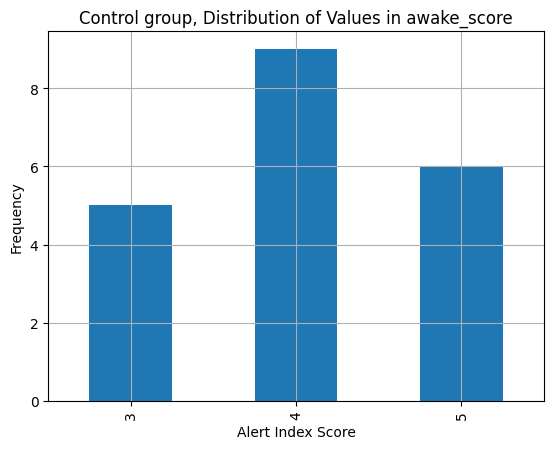

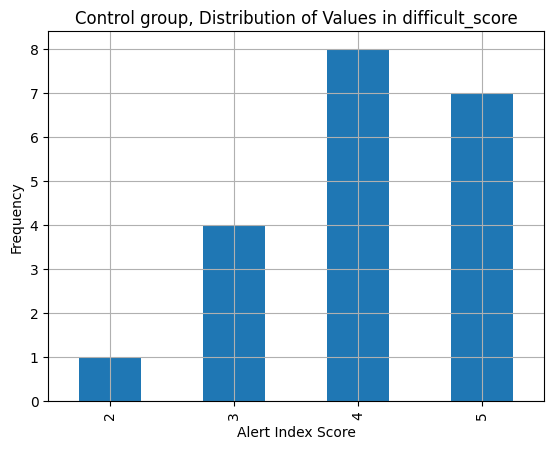

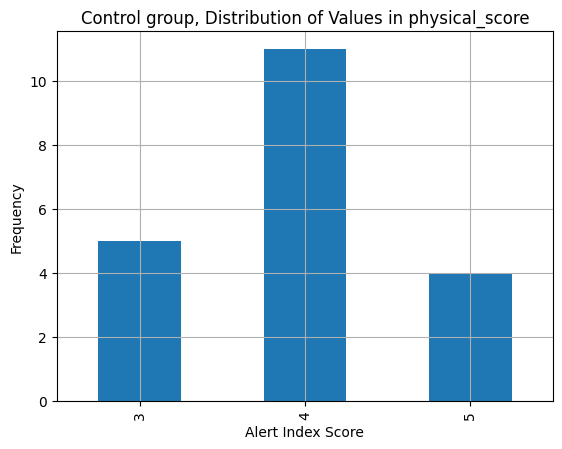

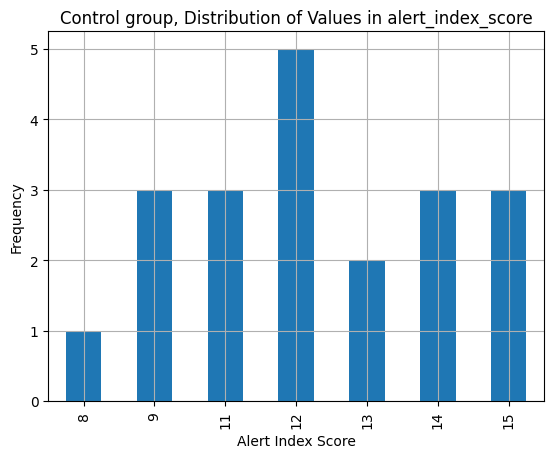

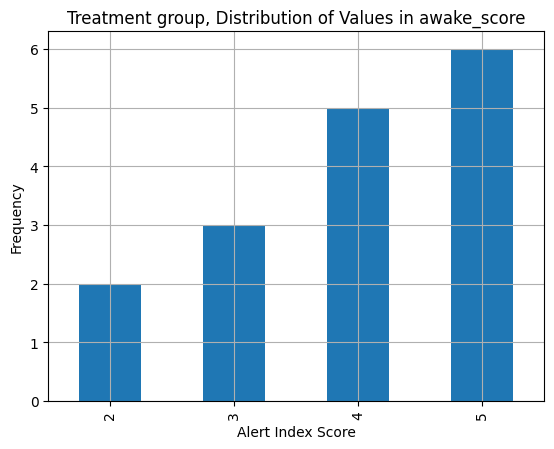

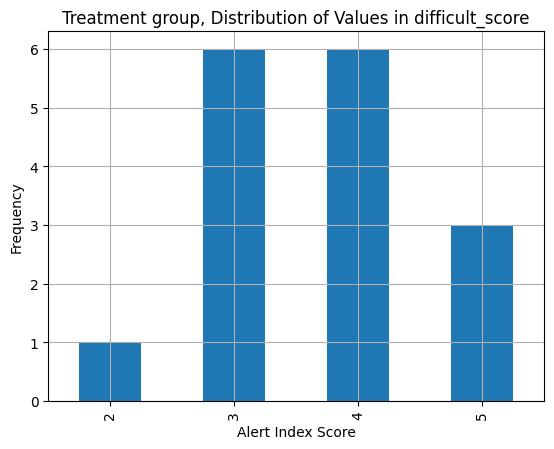

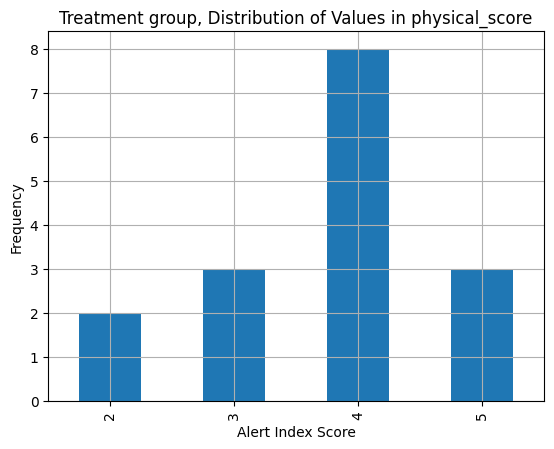

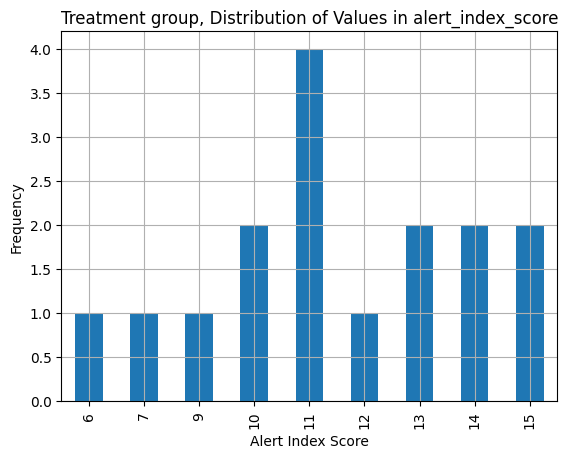

In [101]:
# visualizing distributions
for day in [1,2]:
    for metric in ['awake_score','difficult_score','physical_score','alert_index_score']:

        df[df['experiment_day']==day][metric].value_counts().sort_index().plot(kind='bar')

        # Add labels and title
        plt.xlabel('Alert Index Score')
        plt.ylabel('Frequency')
        if day == 1:
            plt.title('Control group, Distribution of Values in '+str(metric))
        else:
            plt.title('Treatment group, Distribution of Values in '+str(metric))
        plt.grid()
        # Show the plot
        plt.show()

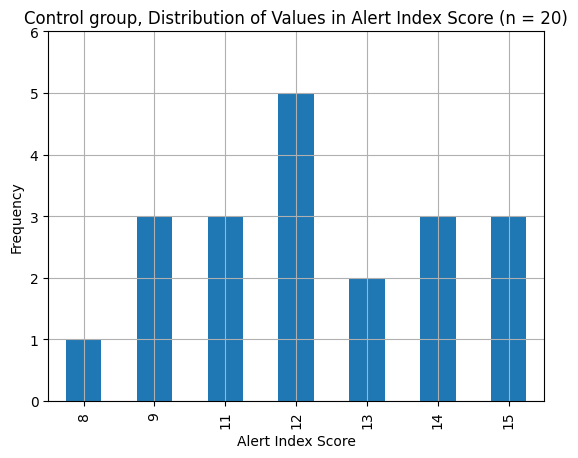

In [111]:
df[df['experiment_day']==1]['alert_index_score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Alert Index Score')
plt.ylabel('Frequency')
plt.title('Control group, Distribution of Values in Alert Index Score (n = 20)')
plt.ylim(0,6)
plt.grid()
plt.show()

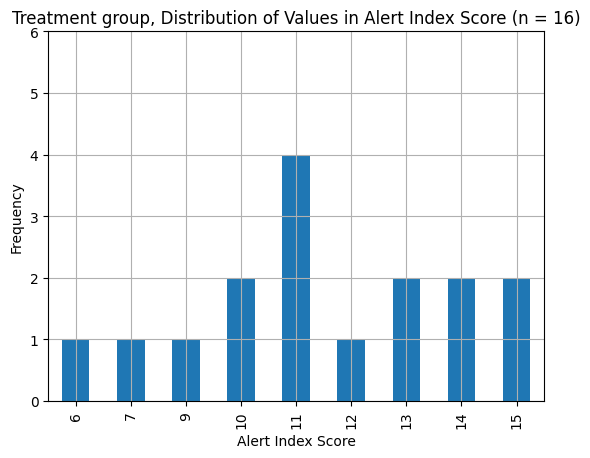

In [112]:
df[df['experiment_day']==2]['alert_index_score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Alert Index Score')
plt.ylabel('Frequency')
plt.title('Treatment group, Distribution of Values in Alert Index Score (n = 16)')
plt.ylim(0,6)
plt.grid()
plt.show()

In [ ]:
# Between subjects comparison assumption (n = 36)

In [116]:
print(df[df['experiment_day']==1]['alert_index_score'].mean())
print(df[df['experiment_day']==2]['alert_index_score'].mean())
print(11.4-12.1)

12.05
11.375
-0.6999999999999993


In [119]:
from scipy.stats import ttest_ind
control_scores = df[df['experiment_day'] == 1]['alert_index_score']
treatment_scores = df[df['experiment_day'] == 2]['alert_index_score']

t_stat, p_val = ttest_ind(treatment_scores, control_scores, equal_var=False)
print(f"t = {t_stat:.2f}, p = {p_val:.3f}")

t = -0.83, p = 0.413


In [121]:
control = df[df['experiment_day'] == 1]['alert_index_score']
treatment = df[df['experiment_day'] == 2]['alert_index_score']

# Calculate pooled standard deviation
pooled_std = np.sqrt(((control.std() ** 2) + (treatment.std() ** 2)) / 2)

# Calculate Cohen's d
cohen_d = (treatment.mean() - control.mean()) / pooled_std
print(f"Cohen's d: {cohen_d:.2f}")

Cohen's d: -0.28


In [ ]:
# Paired Differences assumption (n = 8)

In [117]:
# Rename the group labels for clarity
df['group'] = df['experiment_day'].map({1: 'control', 2: 'treatment'})

# Pivot the data: one row per participant, columns for control and treatment scores
pivot_df = df.pivot_table(index='Name', columns='group', values='alert_index_score')

# Drop participants who didn't complete both conditions
paired_df = pivot_df.dropna(subset=['control', 'treatment'])

# Compute the within-person difference (treatment - control)
paired_df['diff'] = paired_df['treatment'] - paired_df['control']

# Estimate the mean paired ATE
mean_diff = paired_df['diff'].mean()
print(f"Paired ATE (treatment - control): {mean_diff:.2f}")

Paired ATE (treatment - control): -0.40


In [120]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(paired_df['treatment'], paired_df['control'])
print(f"Paired t = {t_stat:.2f}, p = {p_val:.3f}")

Paired t = -0.27, p = 0.803


In [ ]:
# Regression analysis

In [76]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\fquad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 640.0 kB/s eta 0:00:16
   ---------------------------------------- 0.1/9.9 MB 825.8 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.9 MB 3.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.9 MB 10.3 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.9 MB 20.8 MB/s eta 0:00:01
   ------------------------------ --------- 7.4/9.9 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 33.1 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 30.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/232.9 kB ? eta -:--:--
   -------------------------------------- - 225.3/232.9 kB ? eta -:--:--
   ---------------------------------------- 232.9/232.9 kB 3.5 MB/s eta 0:00:00


In [123]:
df.columns

Index(['Timestamp', 'Name', 'Email', 'criteria_ind', 'wake_up_ts',
       'drink_coffee_ts', 'hrs_since_woke', 'awake_answer', 'difficult_answer',
       'physical_answer', 'num_cups_today',
       'Did you notice any differences in your alertness today compared to yesterday? (Open-ended) ',
       'Any additional comments about your experience with drinking coffee at this time? (Open-ended) ',
       'time_diff', 'experiment_day', 'awake_score', 'difficult_score',
       'physical_score', 'alert_index_score', 'group', 'treatment'],
      dtype='object')

In [ ]:
# basic regression
import statsmodels.formula.api as smf

df['treatment'] = df['experiment_day'].map({1: 0, 2: 1})

model = smf.ols("alert_index_score ~ treatment + hrs_since_woke + num_cups_today", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      alert_index_score   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                 -0.070
Method:                 Least Squares   F-statistic:                    0.4922
Date:                Mon, 14 Apr 2025   Prob (F-statistic):              0.741
Time:                        14:00:18   Log-Likelihood:                -71.115
No. Observations:                  32   AIC:                             152.2
Df Residuals:                      27   BIC:                             159.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [137]:
# basic regression on each individual score as dependent variable
for outcome in ['awake_score', 'difficult_score','physical_score']:
    model = smf.ols(str(outcome)+" ~ treatment + hrs_since_woke + num_cups_today", data=df).fit()
    print(model.summary())
    print('\n')

                            OLS Regression Results                            
Dep. Variable:            awake_score   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                 -0.057
Method:                 Least Squares   F-statistic:                    0.5823
Date:                Mon, 14 Apr 2025   Prob (F-statistic):              0.678
Time:                        14:12:21   Log-Likelihood:                -40.112
No. Observations:                  32   AIC:                             90.22
Df Residuals:                      27   BIC:                             97.55
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<Axes: xlabel='treatment', ylabel='alert_index_score'>

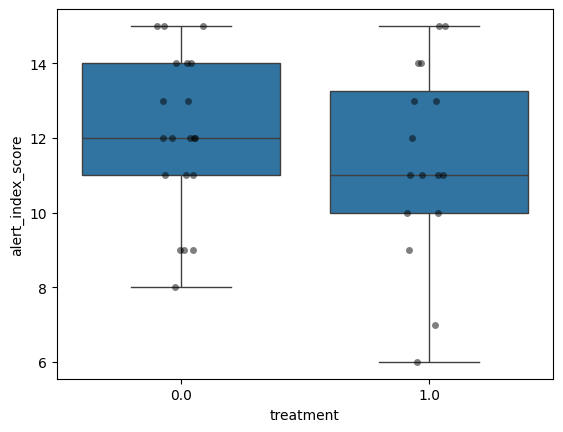

In [133]:
sns.boxplot(x='treatment', y='alert_index_score', data=df)
sns.stripplot(x='treatment', y='alert_index_score', data=df, color='black', alpha=0.5)

In [130]:
model = smf.ols("alert_index_score ~ treatment + num_cups_today + C(Name)", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      alert_index_score   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     1.233
Date:                Mon, 14 Apr 2025   Prob (F-statistic):              0.447
Time:                        14:03:30   Log-Likelihood:                -40.192
No. Observations:                  32   AIC:                             134.4
Df Residuals:                       5   BIC:                             174.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [132]:
model = smf.mixedlm("alert_index_score ~ treatment + num_cups_today", data=df, groups=df["Name"])
result = model.fit()
print(result.summary())

IndexError: index 39 is out of bounds for axis 0 with size 32

In [ ]:
!pip install graphviz

In [138]:
from graphviz import Digraph

dot = Digraph()

# Define nodes
dot.node('A', 'Start')
dot.node('B', 'Assign to Control or Treatment')
dot.node('C', 'Wait ~6 Hours')
dot.node('D', 'Take Alertness Survey')
dot.node('E', 'Analyze Results')

# Define edges (flow)
dot.edges(['AB', 'BC', 'CD', 'DE'])

# Render (in notebook or save as file)
dot.render('flow_diagram', format='png', cleanup=True)
dot.view()

ModuleNotFoundError: No module named 'graphviz'